# Data Cleaning

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

In [154]:
path = '/Users/SarthakPratik/Downloads/online_retail.xlsx'

df = pd.read_excel(path,index_col=0,parse_dates=True)

In [88]:
df.dropna(inplace=True)
df

,Sales
Month,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


# Visual Analysis

<AxesSubplot:xlabel='Month'>

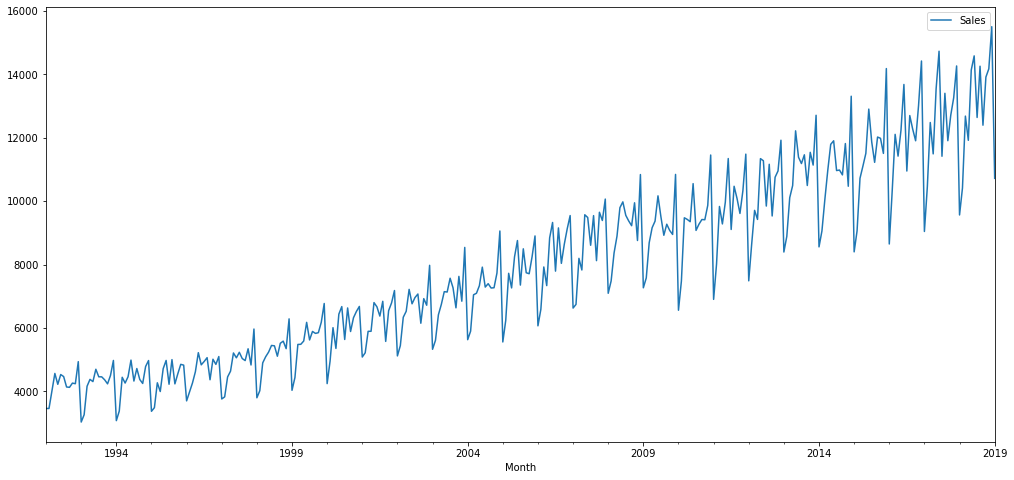

In [89]:
df.plot(figsize=(17,8))

# Stationarity Check

Though it clearly seems to be a Non-Stationary Series

In [90]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df,autolag = 'AIC')

print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. No. of Lags :',dftest[2])
print('4. Number of Observations used for ADF Regression and Crtitical Value Calculation :',dftest[3])
print('5. Critical Values :',)
for key, val in dftest[4].items():
    print("\t",key,": ",val)

1. ADF : 2.0374047259137007
2. P-Value : 0.9987196267088919
3. No. of Lags : 14
4. Number of Observations used for ADF Regression and Crtitical Value Calculation : 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


# Differencing

In [91]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [92]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)
df.dropna(inplace=True)
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1993-01-01,3031,-1905.0,-428.0
1993-02-01,3261,230.0,-197.0
1993-03-01,4160,899.0,158.0
1993-04-01,4377,217.0,-187.0
1993-05-01,4307,-70.0,86.0


# Stationarity Check for Differenced Series

In [93]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Seasonal First Difference'],autolag = 'AIC')

print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. No. of Lags :',dftest[2])
print('4. Number of Observations used for ADF Regression and Crtitical Value Calculation :',dftest[3])
print('5. Critical Values :',)
for key, val in dftest[4].items():
    print("\t",key,": ",val)

1. ADF : -3.339310729669539
2. P-Value : 0.013210159306746589
3. No. of Lags : 13
4. Number of Observations used for ADF Regression and Crtitical Value Calculation : 299
5. Critical Values :
	 1% :  -3.4524113009049935
	 5% :  -2.8712554127251764
	 10% :  -2.571946570731871


# Finding the Best Model

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

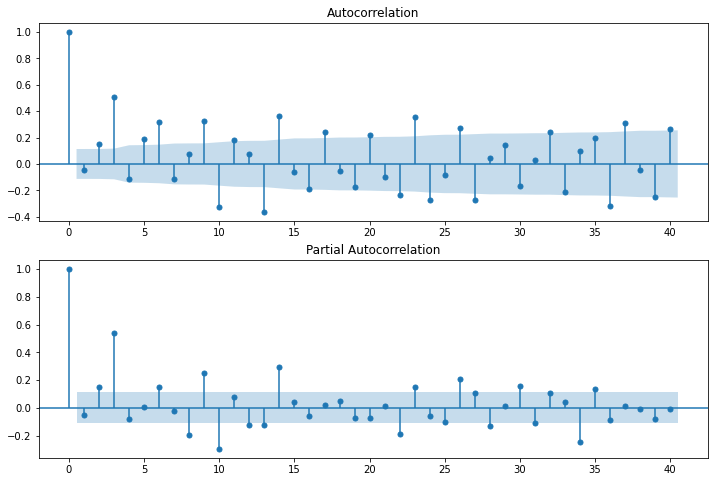

In [97]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

or

In [98]:
from pmdarima import auto_arima

In [99]:
stepwise_fit = auto_arima(df['Seasonal First Difference'].dropna(),trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4546.537, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4870.158, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4733.263, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4630.754, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4868.183, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4594.654, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4548.101, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4605.704, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4569.906, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4545.071, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4593.166, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  313
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2261.413
Date:                Sat, 26 Dec 2020   AIC                           4532.826
Time:                        12:32:28   BIC                           4551.541
Sample:                             0   HQIC                          4540.305
                                - 313                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1295      0.050     -2.564      0.010      -0.228      -0.031
ar.L2          0.1778      0.057      3.137      0.002       0.067       0.289
ar.L3          0.5461      0.049     11.155      0.000       0.450       0.642
ma.L1         -0.9797      0.021    -46.888      0.000      -1.021      -0.939
sigma2      1.148e+05   7985.015     14.379      0.000    9.92e+04     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                15.24
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Modelling Up

In [100]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(3, 1, 1),seasonal_order=(3,1,1,12))
results=model.fit()

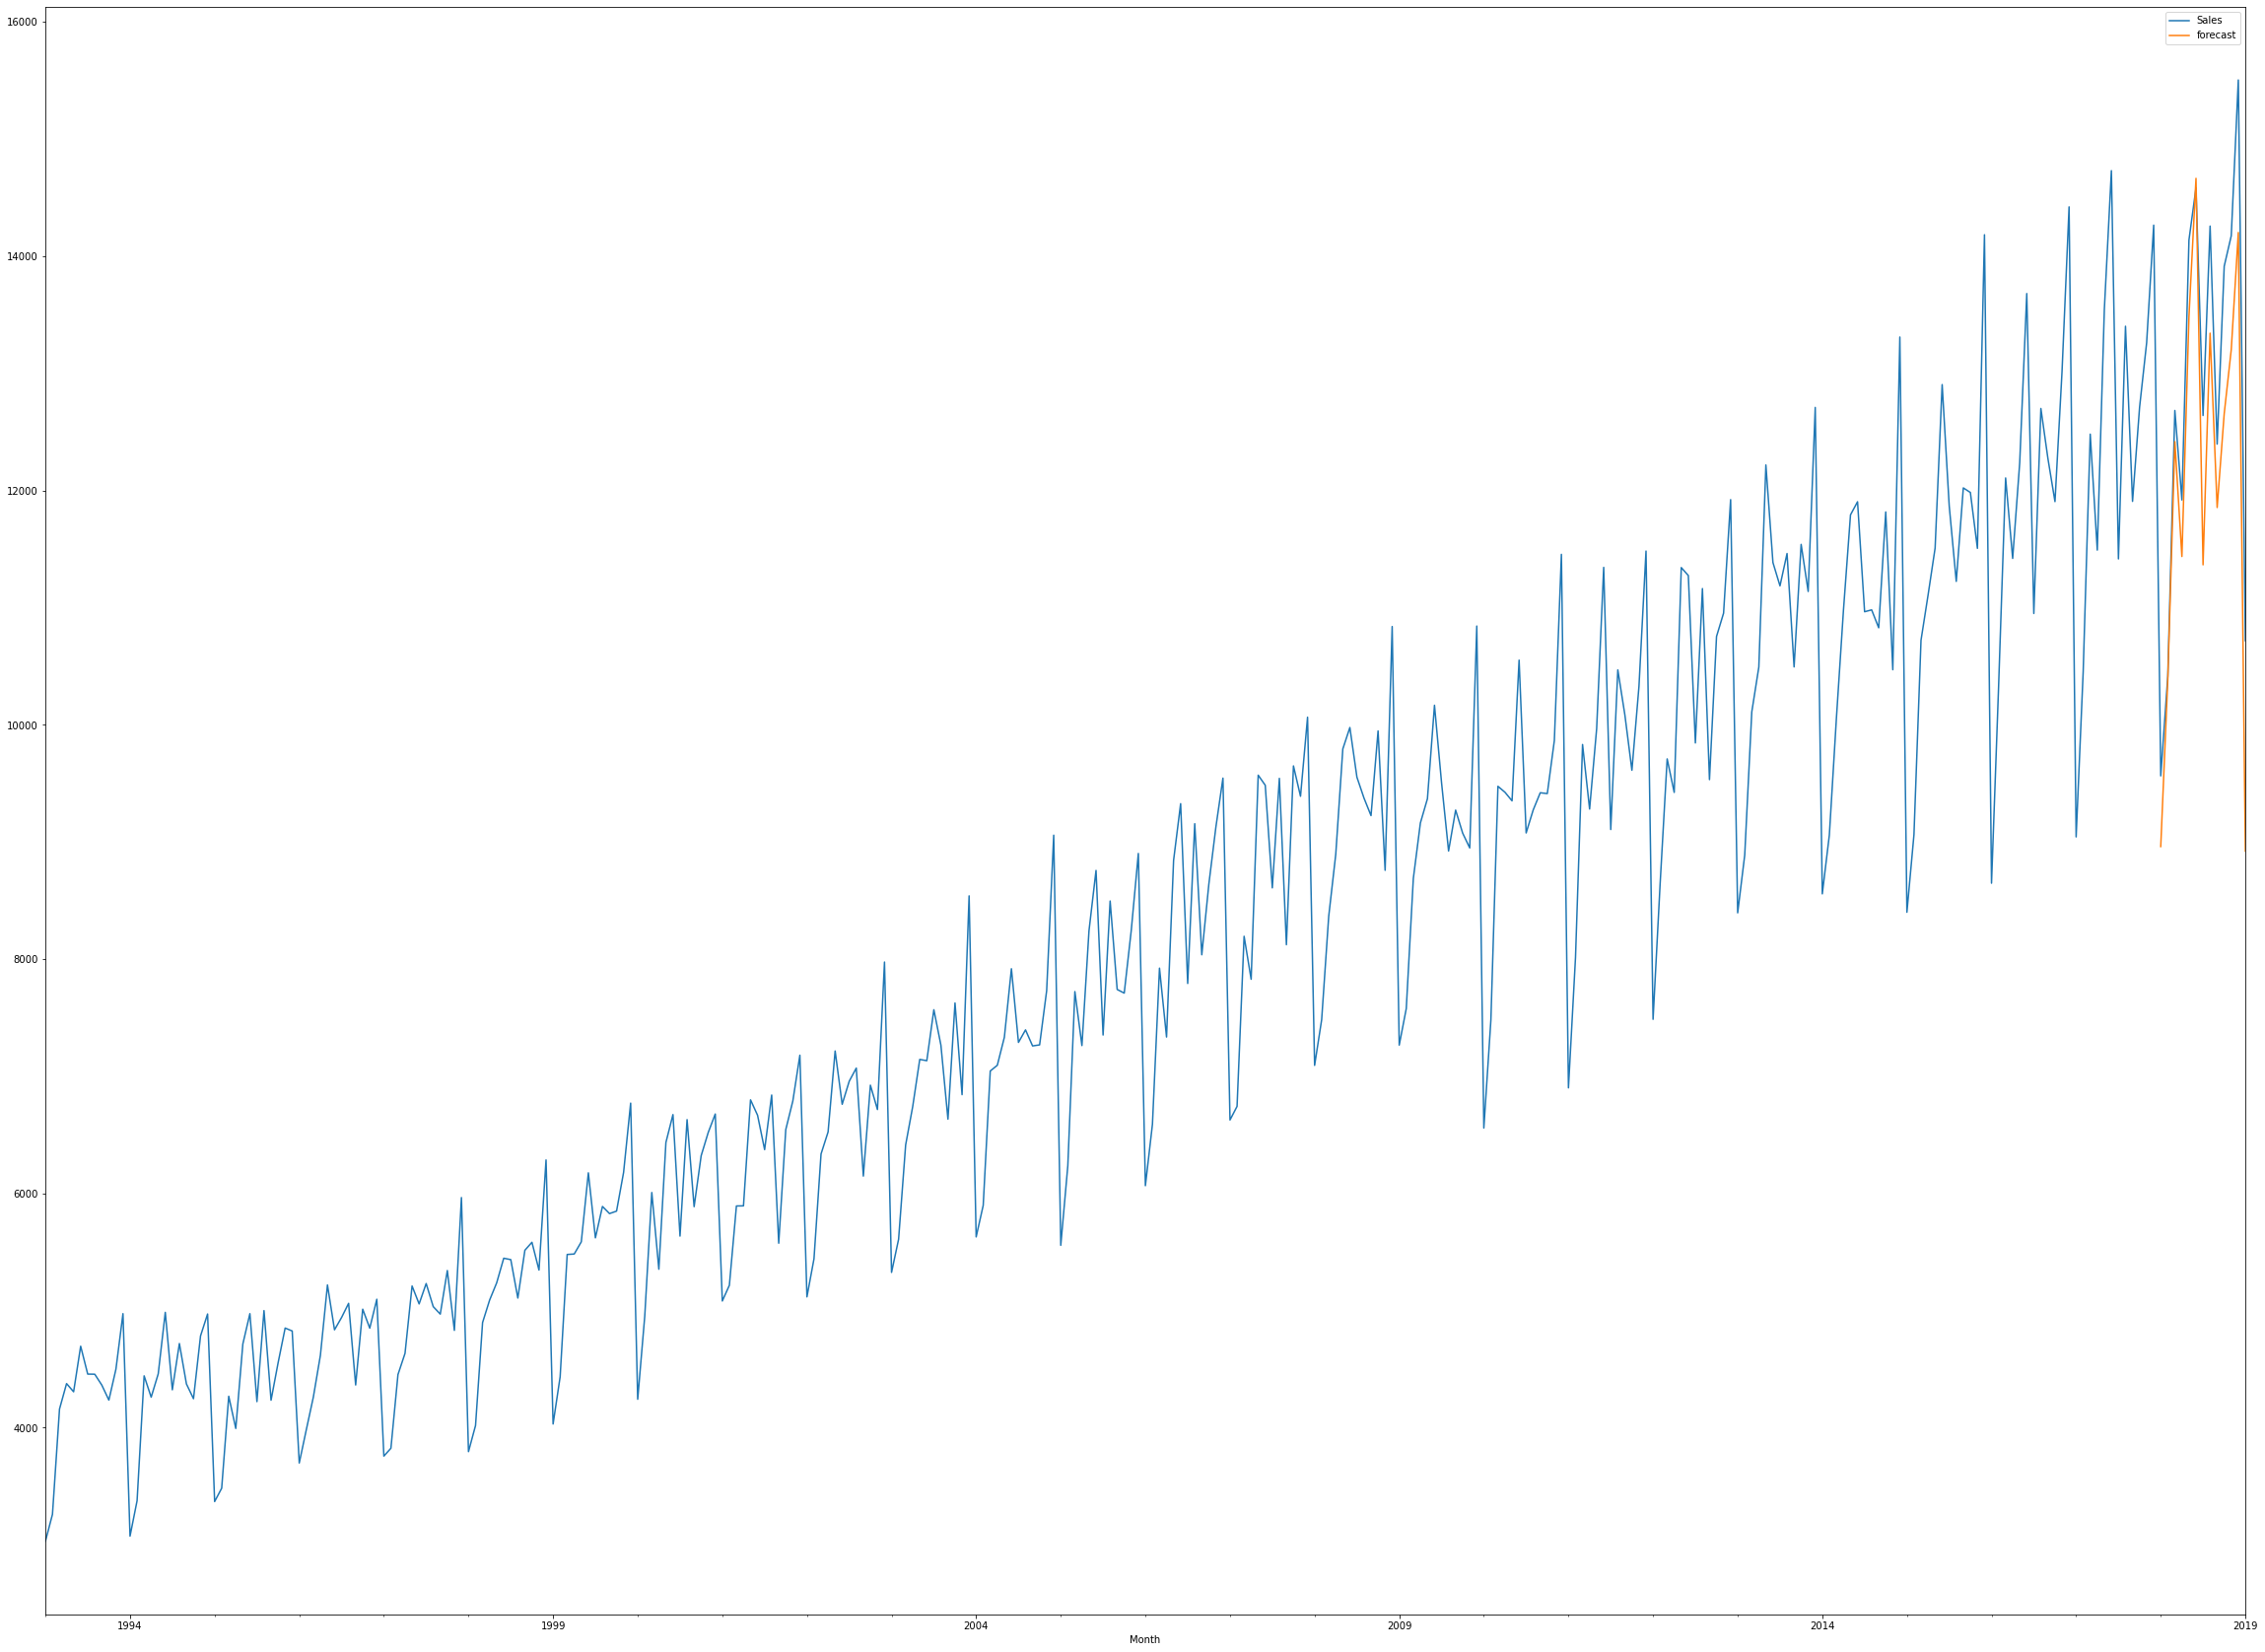

In [149]:
df['forecast']=results.predict(start=300,end=313,dynamic=True)
df[['Sales','forecast']].plot(figsize=(40,30))

plt.show()

In [169]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [170]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [166]:
future_df=pd.concat([df,future_datest_df])
future_df.tail(30)

,Sales
2017-07-01,11416
2017-08-01,13402
2017-09-01,11907
2017-10-01,12711
2017-11-01,13261
2017-12-01,14265
2018-01-01,9564
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919


In [172]:
future_df['forecast'] = results.predict(start = 313, end = 323, dynamic= True)  
future_df.tail(30)

,Sales,forecast
2017-07-01,11416,NaN
2017-08-01,13402,NaN
2017-09-01,11907,NaN
2017-10-01,12711,NaN
2017-11-01,13261,NaN
2017-12-01,14265,NaN
2018-01-01,9564,NaN
2018-02-01,10415,NaN
2018-03-01,12683,NaN
2018-04-01,11919,NaN


<AxesSubplot:>

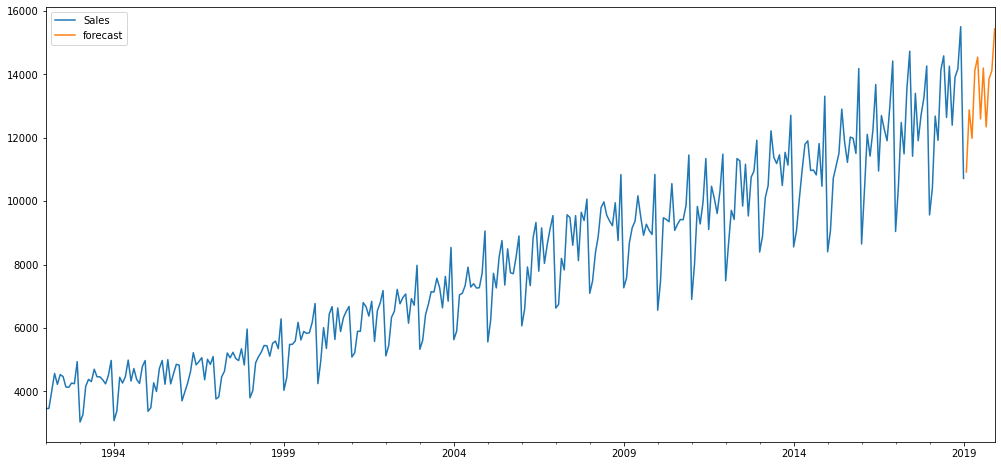

In [173]:
future_df[['Sales', 'forecast']].plot(figsize=(17, 8))

# Getting the Predicted Sales Data

In [175]:
future_df.to_excel("/Users/SarthakPratik/Downloads/Future_Sales_df.xlsx")